<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [ ]:
X = data_values[:,:8]
y = data_values[:,8]

# Holdount

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

In [ ]:
"""
@Description: Implement a matrix of confusion of a binary model
@Values:
          validation (Series) a series with values of test
          prediction (Series) a series with values of prediction
          title (String)  title
          target (String)
          not_target (String)
"""

def matrix_confusion(validation, prediction, title, target, not_target):
  matrix = metrics.confusion_matrix(validation, prediction)
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))
  sns.heatmap(matrix, annot=True, ax = ax,cmap=plt.cm.Blues,fmt='g',annot_kws={"size": 13})
  ax.set_title(title,size=13)

  ax.xaxis.set_ticklabels([not_target,target])
  ax.yaxis.set_ticklabels([not_target,target], va="center")

  ax.tick_params(labelsize = 13)

  return matrix

In [ ]:
"""
@Description: This method show some metrics for algorithms of classification binary
@Values:
          - validation (Series) a series with values of test
          - prediction (Series) a series with values of prediction
          - name_target (Serie) 
          - label: target
          - matrix (ndarray)
"""

def metrics_clasification_binary(validation, prediction, name_target,label, matrix):
  print('Accuracy', metrics.accuracy_score(validation, prediction))
  print('Kappa',  metrics.cohen_kappa_score(validation, prediction))
  print('----------------------------------------------------------- \n')

  print(f'Metrics of {name_target}')
  print('Precision', metrics.precision_score(validation, prediction, label, average='macro'))
  print("Recall: ",  metrics.recall_score(validation, prediction, label, average='macro'))
  
  VN = matrix[0,0]
  FP = matrix[0,1]
  specificity = VN/(VN+FP)

  print('Specificity', specificity)
  print("F1-score      : ", metrics.f1_score(validation, prediction, label, average='macro'))

In [ ]:
"""
@Description: This method shows the balance between class
@Values:
        - data (DataFrame)
        - tag (string)
        - target (string)
        - not_target (string)
        - title (string)

"""
def balance_data(data, tag, target, not_target, title):
  fig, ax = plt.subplots(figsize = (6,4))
  fig.suptitle(f'Count plot {title}', fontsize = 15)
  sns.countplot(x = tag, data = data, ax = ax)
  ax.set_ylabel(f'{tag}(ni)', size = 12)
  data_target = data[tag].value_counts()
  len_data = data.shape[0]
  pe = '{0:.2f}'.format(data_target[1]/len_data)
  ps = '{0:.2f}'.format(data_target[0]/len_data)
  ax.set_xticklabels([f'{not_target} \n {ps}', f'{target} \n {pe}'], size = 10)

In [ ]:
"""
  [description]
    - Visualiza una comparativa entre dos series de valores de las métricas de redes neuronales (accuracy vs val_accuracy)(loss vs val_loss)
  [values]
    - data
    - data_value            : serie correspondiente a los datos obtenidos durante el entrenamiento
    - data_value_validation : serie correspondiente a los datos obtenidos durante la validación
    - tag                   : una cadena que representa una etiqueta del eje y
    - title                 : titulo del grafico
"""

def plot_metrics_valuate(data, data_value, data_value_validation, tag, title):
  fig, ax = plt.subplots(figsize = (8,4))
  fig.suptitle(title, fontsize = 15)
  ax.plot(history.history[data_value])
  ax.plot(history.history[data_value_validation])
  ax.set_xlabel('Epochs', size = 12)
  ax.set_ylabel(tag, size = 12)
  ax.legend(['Train', 'Test'], loc='upper left', fontsize = 12)
  ax.tick_params(labelsize = 12)


In [ ]:
def model_base():
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

  #Compile
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [Recall()])
  return model

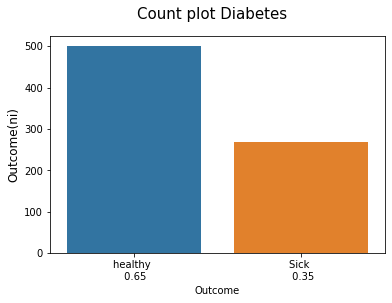

In [ ]:
# Data balance
balance_data(data, 'Outcome', 'Sick','healthy', 'Diabetes')

- Hay un desbalance

In [ ]:
model = model_base()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)

In [ ]:
# Problema de optimización
loss, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % (recall))
print('Loss: %.3f' % (loss))

17/17 [==============================] - 0s 1ms/step - loss: 0.4969 - recall: 0.4722
Recall: 0.472
Loss: 0.497


In [ ]:
loss, recall = model.evaluate(X_test, y_test)
print('Recall: %.3f' % (accuracy))
print('Loss: %.3f' % (loss))

8/8 [==============================] - 0s 2ms/step - loss: 0.5244 - recall: 0.6023
Recall: 0.472
Loss: 0.524


In [ ]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


# Recall and Loss

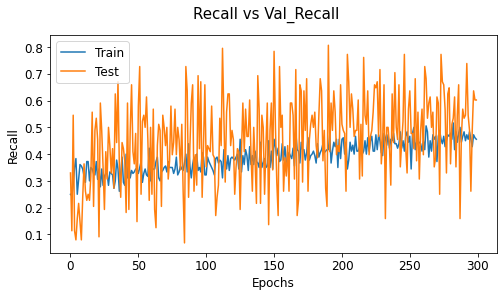

In [ ]:
plot_metrics_valuate(history, 'recall', 'val_recall', 'Recall', 'Recall vs Val_Recall')

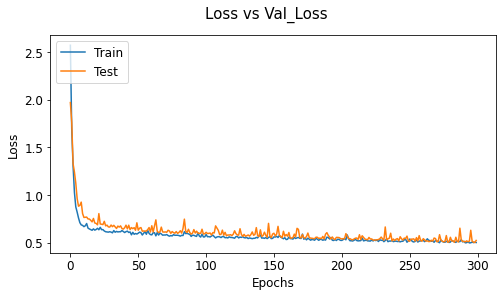

In [ ]:
plot_metrics_valuate(history, 'loss', 'val_loss', 'Loss', 'Loss vs Val_Loss')

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [ ]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = y_pred.reshape((y_pred.shape[0]))

In [ ]:
for i in range(15):
  print('%s --> %d (real %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[4.0, 114.0, 64.0, 0.0, 0.0, 28.9, 0.126, 24.0] --> 0 (real 0)
[0.0, 102.0, 78.0, 40.0, 90.0, 34.5, 0.23800000000000002, 24.0] --> 0 (real 0)
[3.0, 158.0, 76.0, 36.0, 245.0, 31.6, 0.851, 28.0] --> 0 (real 1)
[1.0, 97.0, 68.0, 21.0, 0.0, 27.2, 1.095, 22.0] --> 0 (real 0)
[4.0, 94.0, 65.0, 22.0, 0.0, 24.7, 0.14800000000000002, 21.0] --> 0 (real 0)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.4409999999999998, 57.0] --> 1 (real 0)
[3.0, 90.0, 78.0, 0.0, 0.0, 42.7, 0.5589999999999999, 21.0] --> 0 (real 0)
[0.0, 162.0, 76.0, 36.0, 0.0, 49.6, 0.364, 26.0] --> 1 (real 1)
[6.0, 96.0, 0.0, 0.0, 0.0, 23.7, 0.19, 28.0] --> 1 (real 0)
[8.0, 120.0, 0.0, 0.0, 0.0, 30.0, 0.183, 38.0] --> 1 (real 1)
[3.0, 87.0, 60.0, 18.0, 0.0, 21.8, 0.444, 21.0] --> 0 (real 0)
[6.0, 114.0, 88.0, 0.0, 0.0, 27.8, 0.247, 66.0] --> 0 (real 0)
[1.0, 96.0, 122.0, 0.0, 0.0, 22.4, 0.207, 27.0] --> 0 (real 0)
[3.0, 111.0, 56.0, 39.0, 0.0, 30.1, 0.557, 30.0] --> 0 (real 0)
[7.0, 81.0, 78.0, 40.0, 48.0, 46.7, 0.261, 42.0] --> 0 (real 

# Confusion Matrix

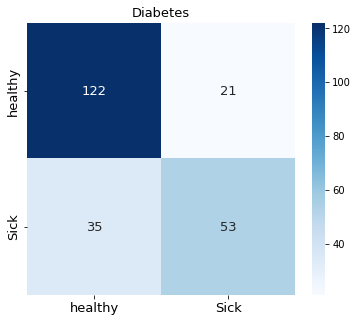

In [ ]:
matrix = matrix_confusion(y_test, y_pred, 'Diabetes', 'Sick', 'healthy')

# Metrics

In [ ]:
metrics_clasification_binary(y_test, y_pred, 'Diabetes',[1], matrix)

Accuracy 0.7575757575757576
Kappa 0.46979260595130745
----------------------------------------------------------- 

Metrics of Diabetes
Precision 0.7162162162162162
Recall:  0.6022727272727273
Specificity 0.8531468531468531
F1-score      :  0.654320987654321


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [ ]:
#StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []

for train, test in kfold.split(X,y):
  model = model_base()
  model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=150, batch_size = 16, verbose = 0)
  loss_train, recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

loss: 0.569 recall: 82.573% val_loss: 0.530 val_recall: 53.036%
loss: 0.500 recall: 56.017% val_loss: 0.467 val_recall: 46.675%
loss: 0.547 recall: 31.950% val_loss: 0.598 val_recall: 59.821%
loss: 0.580 recall: 1.660% val_loss: 0.546 val_recall: 54.614%
loss: 0.542 recall: 31.950% val_loss: 0.527 val_recall: 52.698%
loss: 0.523 recall: 42.739% val_loss: 0.461 val_recall: 46.109%
loss: 0.516 recall: 59.336% val_loss: 0.537 val_recall: 53.692%
loss: 0.488 recall: 46.058% val_loss: 0.528 val_recall: 52.823%
loss: 0.497 recall: 69.421% val_loss: 0.540 val_recall: 54.037%
loss: 0.541 recall: 36.364% val_loss: 0.415 val_recall: 41.467%
==============================Train Recall Total 10 pliegues==============================
0.46% (+/- 0.22%)
==============================Test Recall Total 10 pliegues==============================
0.45% (+/- 0.21%)
==============================Train Loss Total 10 pliegues==============================
0.53% (+/- 0.03%)
==============================Test Lo

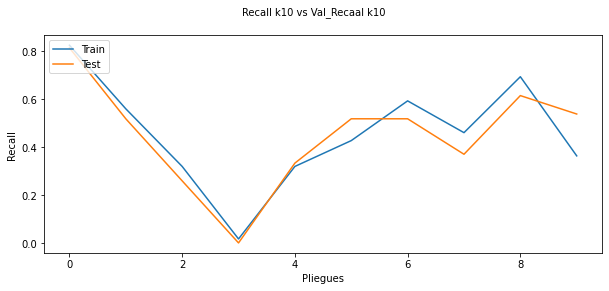

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

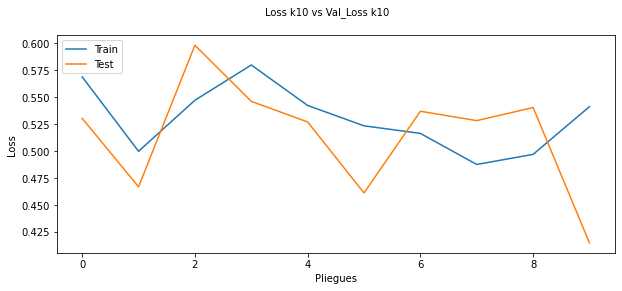

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)